<a href="https://www.kaggle.com/code/collinsbaragbor/prosper-loan-data-analysis?scriptVersionId=105443668" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Part I - Loan Data from Prosper Analysis
## by Collins Baragbor

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.
This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# Fetching dataset from url and saving to folder
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [2]:
df_loan_data = pd.read_csv('../input/prosper-loan-data/prosperLoanData.csv')
df_loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df_loan_data.shape

(113937, 81)

In [4]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df_loan_data.duplicated().value_counts()

False    113937
dtype: int64

In [6]:
# Columns needed for my visualizations
columns = ['LoanKey', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)', 
           'BorrowerState', 'Occupation', 'EmploymentStatus', 'LoanOriginalAmount', 'CreditScoreRangeLower',
           'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'Investors', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 
           'IncomeVerifiable', 'ProsperRating (Alpha)']

clean_loan_data = df_loan_data[columns]
clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   LoanOriginalAmount         113937 non-null  int64  
 10  CreditScoreRangeLower      113346 non-null  float64
 11  CreditScoreRangeUpper      113346 non-null  float64
 12  DebtToIncomeRatio          105383 non-null  float64
 13  Investors                  11

In [7]:
# Check dataframe for duplicated values
clean_loan_data.duplicated().sum()

871

In [8]:
# Drop duplicated values
clean_loan_data = clean_loan_data.drop_duplicates()

# Check to confirm duplicated values have been dropped
clean_loan_data.duplicated().sum()

0

In [9]:
# Check dataframe for missing values
clean_loan_data.isnull().sum()

LoanKey                          0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3529
EmploymentStatus              2255
LoanOriginalAmount               0
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
DebtToIncomeRatio             8472
Investors                        0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
IncomeVerifiable                 0
ProsperRating (Alpha)        29084
dtype: int64

In [10]:
clean_loan_data.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [11]:
# From the above two cells, it is clear that `EmploymentStatus` column has both 'Not available' and Nan values.
# So we would replace Nan values with 'Not available'.
clean_loan_data.EmploymentStatus.fillna('Not available', inplace=True)

#Check value counts to confirm
clean_loan_data.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Not available     7602
Self-employed     6052
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [12]:
# Drop other missing values 
clean_loan_data = clean_loan_data.dropna()

# Check to confirm missing values have been dropped
clean_loan_data.isnull().sum()

LoanKey                      0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
LoanOriginalAmount           0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
DebtToIncomeRatio            0
Investors                    0
StatedMonthlyIncome          0
MonthlyLoanPayment           0
IncomeVerifiable             0
ProsperRating (Alpha)        0
dtype: int64

In [13]:
clean_loan_data.shape

(75494, 18)

#### Define: 
Convert `ListingCategory (numeric)` to its corresponding element.

#### Code

In [14]:
listing_cat={0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student Use',
          6:'Auto',7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',
 13:'Household Expenses',14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}

def List_Cat(x,y=listing_cat):
    return y[x]
clean_loan_data.rename(columns={'ListingCategory (numeric)': 'ListingCategory'},inplace=True)
clean_loan_data['ListingCategory'] = clean_loan_data['ListingCategory'].apply(List_Cat)

#### Test

In [15]:
clean_loan_data.head()

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,Investors,StatedMonthlyIncome,MonthlyLoanPayment,IncomeVerifiable,ProsperRating (Alpha)
1,9E3B37071505919926B1D82,36,Current,0.12016,0.0920,Home Improvement,CO,Professional,Employed,10000,680.0,699.0,0.18,1,6125.000000,318.93,True,A
3,A0393664465886295619C51,36,Current,0.12528,0.0974,Motorcycle,GA,Skilled Labor,Employed,10000,800.0,819.0,0.15,158,2875.000000,321.45,True,A
4,A180369302188889200689E,36,Current,0.24614,0.2085,Home Improvement,MN,Executive,Employed,15000,680.0,699.0,0.26,20,9583.333333,563.97,True,D
5,C3D63702273952547E79520,60,Current,0.15425,0.1314,Debt Consolidation,NM,Professional,Employed,15000,740.0,759.0,0.36,1,8333.333333,342.37,True,B
6,CE963680102927767790520,36,Current,0.31032,0.2712,Debt Consolidation,KS,Sales - Retail,Employed,3000,680.0,699.0,0.27,1,2083.333333,122.67,True,E


### What is the structure of your dataset?

> The cleaned dataset consists of 97022 loans (rows) and 18 features (columns).

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in the dataset is `LoanStatus`. I want to find out the factors that affect this feature.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The other 16 features in this dataset will help support my investigation into `LoanStatus`.

## Univariate Exploration

#### Question 1: What is the distribution of `Loan Status` variable and which of them has the highest count?

In [16]:
# First, we get the value_counts
clean_loan_data.LoanStatus.value_counts()

Current                   50466
Completed                 17678
Chargedoff                 4445
Defaulted                   885
Past Due (1-15 days)        709
Past Due (31-60 days)       320
Past Due (91-120 days)      277
Past Due (61-90 days)       274
Past Due (16-30 days)       241
FinalPaymentInProgress      185
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

#### Visualization

In [17]:
# Set default color from color palette
base_color = sns.color_palette()[0]

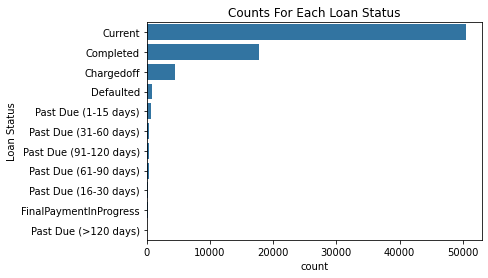

In [18]:
# Using Countplot for distribution
data_order = clean_loan_data.LoanStatus.value_counts().index
sns.countplot(data = clean_loan_data, y = 'LoanStatus', color = base_color, order = data_order)
plt.title('Counts For Each Loan Status');
plt.ylabel('Loan Status');

#### Observations

> It is evident in the above visualization that, Loan status 'current' has the highest count in the distribution.

#### Question 2: Which `Term` has the most number of loans in the dataset?

In [19]:
#Let's get the value counts of each term
na_counts = clean_loan_data.Term.value_counts()
na_counts

36    51476
60    22604
12     1414
Name: Term, dtype: int64

#### Visualization

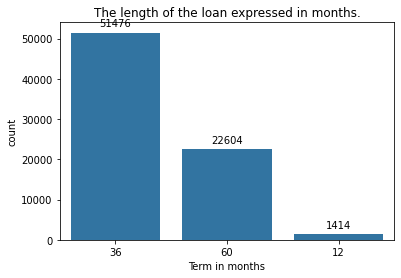

In [20]:
#Using Barplot for this distribution
term_order = clean_loan_data.Term.value_counts().index
sns.countplot(x='Term', data = clean_loan_data, color = base_color, order = term_order)
plt.title('The length of the loan expressed in months.');
plt.xlabel('Term in months')
 
# Adding counts of each term in our data on top of of each bar.
for i in range (clean_loan_data.Term.value_counts().shape[0]):
    count = clean_loan_data.Term.value_counts().values[i]
    plt.text(i, count+3500, count, ha = 'center', va='top')


#### Observations

> From the above plot we can see that majority of the people who took out loans opted for the 36 month plan.

#### Question 3: What information can we derive from the `BorrowerAPR` column?

In [21]:
clean_loan_data.BorrowerAPR.describe()

count    75494.000000
mean         0.224149
std          0.079497
min          0.045830
25%          0.161750
50%          0.215660
75%          0.288480
max          0.423950
Name: BorrowerAPR, dtype: float64

#### Visualization

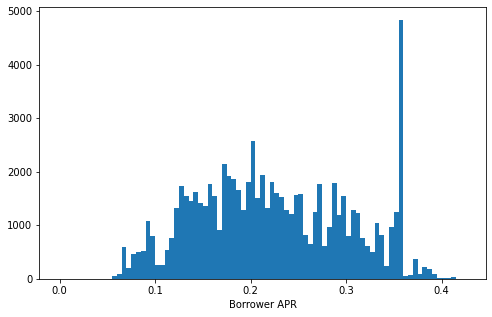

In [22]:
binsize = 0.005
bins = np.arange(0, clean_loan_data.BorrowerAPR.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = clean_loan_data, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.show()

#### Observations

> The maximum APR for borrowers is in the range of 0.35 and 0.37. This could imply that many loans have average percentage rates of between 30% and 40%, which is quite high. And the lowest APR is just 2%. In the range of 0.16 and 0.20, there are some high bins. After 0.20, the number of APR values decreases, but from 0.26 to 0.30, APR rises once more. Then the data decreases and the APR count once more increases dramatically.

#### Question 4: What relationship or pattern is there in `BorrowerRate`?

In [23]:
#Let's get the BorrowerRate column into a variable before going ahead with the visualization
borrower_rate = clean_loan_data.BorrowerRate

#### Visualization

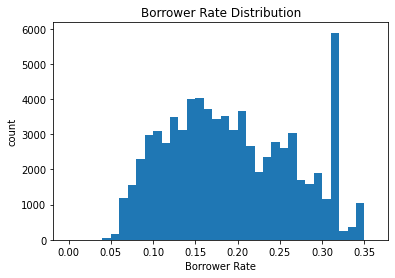

In [24]:
bin_edges = np.arange(0,borrower_rate.max()+0.01,0.01) 
plt.hist(x='BorrowerRate', data = clean_loan_data, bins = bin_edges)
plt.title('Borrower Rate Distribution')
plt.xlabel('Borrower Rate')
plt.ylabel('count');

#### Observations

> The above distribution has two peaks, one between 0.15 and 0.17 and the other between 0.30 and 0.33, making it a bimodal distribution.
The distribution is right-skewed. The count of borrowers decreases after the 0.16 rate, but then suddenly increases in the 0.32 and 0.34 rate range. 

#### Question 5: What relationship or pattern is there in `ListingCategory`?

In [25]:
col_listCategory = clean_loan_data.ListingCategory.value_counts()
col_listCategory

Debt Consolidation    48035
Other                  8249
Home Improvement       6286
Business               3621
Auto                   2028
Household Expenses     1759
Medical/Dental         1369
Large Purchases         783
Taxes                   780
Wedding Loans           722
Vacation                709
Motorcycle              289
Student Use             201
Engagement Ring         198
Baby&Adoption           188
Boat                     83
Cosmetic Procedure       82
RV                       49
Green Loans              44
Not Available            19
Name: ListingCategory, dtype: int64

#### Visualization

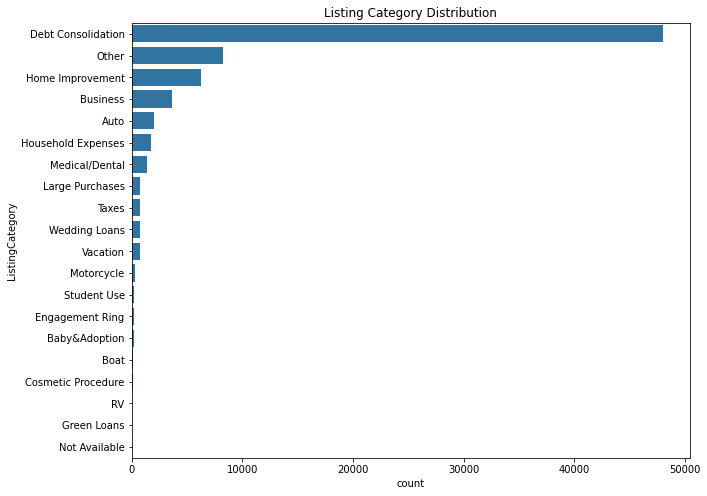

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(y='ListingCategory',data=clean_loan_data,order=col_listCategory.index, color = base_color)
plt.title('Listing Category Distribution');

#### Observations

> It is evident from the plot above that debt consolidation has the most counts. This indicates that people in this category received the most loans. This could imply that a large number of borrowers already had debts, therefore they turned to debt consolidation loans to lessen the weight of those debts and pay a small amount toward a new loan each month at a low interest rate.

#### Question 6: What relationship or pattern is there in `BorrowerState`?

In [27]:
col_state = clean_loan_data.BorrowerState.value_counts()
col_state

CA    9468
NY    5129
TX    5037
FL    4697
IL    3835
OH    3031
GA    2977
VA    2504
NJ    2437
PA    2398
MI    2329
NC    2179
MD    2043
WA    1903
MA    1683
MO    1578
MN    1546
CO    1521
IN    1510
TN    1386
CT    1360
WI    1347
AZ    1220
AL    1076
OR    1035
NV     906
SC     861
KY     798
KS     767
LA     757
AR     685
OK     660
MS     598
NE     489
UT     437
NH     405
RI     374
ID     342
DC     308
HI     306
NM     290
WV     271
DE     253
MT     191
SD     161
AK     149
VT     149
WY     108
Name: BorrowerState, dtype: int64

#### Visualization

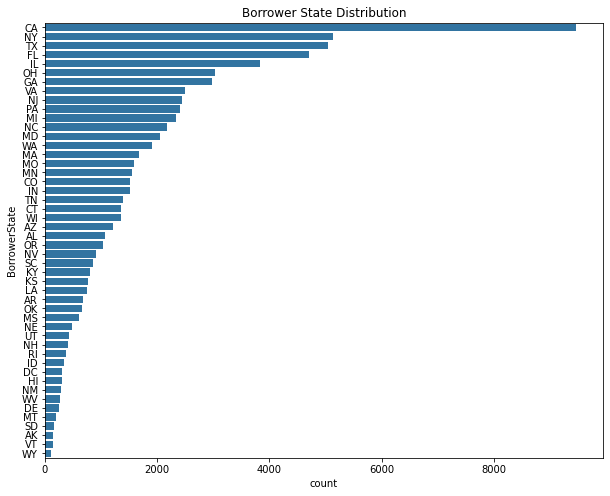

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(y='BorrowerState',data=clean_loan_data,order=col_state.index, color = base_color)
plt.title('Borrower State Distribution');

#### Observations

> From the plot above we can see that the state with the most borrowers is California. 

#### Question 7: What relationship or pattern is there in `EmploymentStatus`?

In [29]:
#let's first get the counts
clean_loan_data.EmploymentStatus.value_counts()

Employed         65160
Full-time         7583
Other             2189
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

#### Visualization

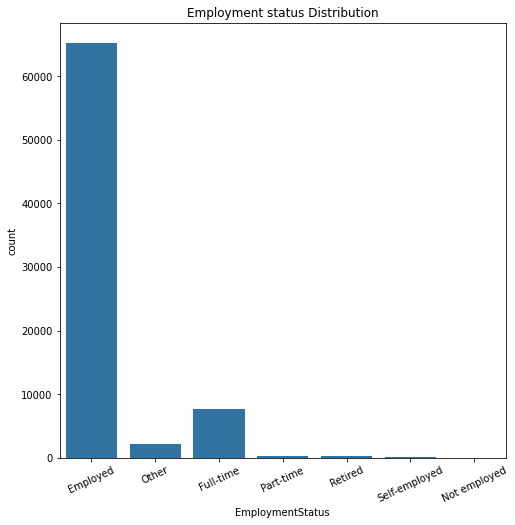

In [30]:
plt.figure(figsize=(8,8))
sns.countplot(x='EmploymentStatus',data=clean_loan_data,color=base_color)
plt.xticks(rotation=25)
plt.title('Employment status Distribution');

#### Observations

> Employed individuals received the most loans.

#### Question 8: What relationship or pattern is there in `LoanOriginalAmount`?

In [31]:
clean_loan_data.LoanOriginalAmount.describe()

count    75494.000000
mean      9273.183869
std       6404.416650
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

#### Visualization

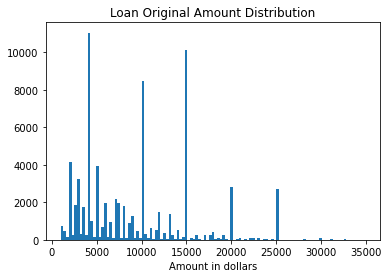

In [32]:
bins = np.arange(1000,clean_loan_data.LoanOriginalAmount.max()+40,300)
plt.hist(x='LoanOriginalAmount',data=clean_loan_data,bins=bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Amount in dollars');

In [33]:
# Let's do a log transgormation to see the data
np.log10(clean_loan_data.LoanOriginalAmount.describe())

count    4.877912
mean     3.967229
std      3.806480
min      3.000000
25%      3.602060
50%      3.903090
75%      4.161368
max      4.544068
Name: LoanOriginalAmount, dtype: float64

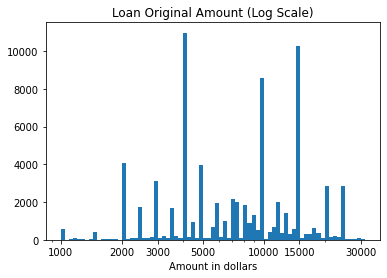

In [34]:
bins = 10** np.arange(3,4.5+0.01,0.02)
tick = [1000,2000,3000,5000,10000,15000,30000]
labels=['{}'.format(x)for x in tick]
plt.hist(x='LoanOriginalAmount',data=clean_loan_data,bins=bins)
plt.xscale('log')
plt.xticks(tick,labels)
plt.title('Loan Original Amount (Log Scale)')
plt.xlabel('Amount in dollars');

#### Observations

> The data from the above plot is right-skewed. Descriptive statistics from the first plot reveal that the lowest loan original amount is 1,000 and the highest is 35,000. We can also see from the plots that the data point density is at its maximum between around 1000 and 8000. This indicates that the maximum number of borrowers borrowed loans with original amounts ranging from roughly 1,000 to 8,000 each.

#### Question 9: What relationship or pattern is there in `DebtToIncomeRatio`?

In [35]:
clean_loan_data.DebtToIncomeRatio.describe()

count    75494.000000
mean         0.258004
std          0.321913
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

#### Visualization

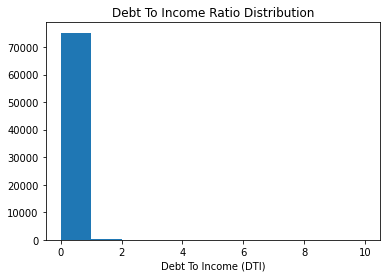

In [36]:
plt.hist(x='DebtToIncomeRatio',data=clean_loan_data)
plt.title('Debt To Income Ratio Distribution')
plt.xlabel('Debt To Income (DTI)');

#### Observations

> The majority of our data ranges from 0 to 1. Between 1 and 2 and between 9 and 10 there are certain points that are greater than 1. Considering that the maximum debt-to-income ratio is around 50%, I believe these are outliers which need to be removed. Removing of outliers is done below.

In [37]:
dti_outliers = (clean_loan_data.DebtToIncomeRatio>1)
df_outliers = clean_loan_data.loc[dti_outliers,:]

# Remove outlier our data.
df_filtered = clean_loan_data.loc[-dti_outliers,:]
df_filtered.head()

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,Investors,StatedMonthlyIncome,MonthlyLoanPayment,IncomeVerifiable,ProsperRating (Alpha)
1,9E3B37071505919926B1D82,36,Current,0.12016,0.0920,Home Improvement,CO,Professional,Employed,10000,680.0,699.0,0.18,1,6125.000000,318.93,True,A
3,A0393664465886295619C51,36,Current,0.12528,0.0974,Motorcycle,GA,Skilled Labor,Employed,10000,800.0,819.0,0.15,158,2875.000000,321.45,True,A
4,A180369302188889200689E,36,Current,0.24614,0.2085,Home Improvement,MN,Executive,Employed,15000,680.0,699.0,0.26,20,9583.333333,563.97,True,D
5,C3D63702273952547E79520,60,Current,0.15425,0.1314,Debt Consolidation,NM,Professional,Employed,15000,740.0,759.0,0.36,1,8333.333333,342.37,True,B
6,CE963680102927767790520,36,Current,0.31032,0.2712,Debt Consolidation,KS,Sales - Retail,Employed,3000,680.0,699.0,0.27,1,2083.333333,122.67,True,E


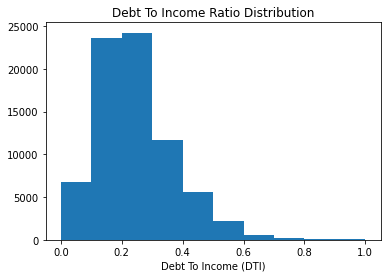

In [38]:
plt.hist(x='DebtToIncomeRatio',data=df_filtered)
plt.title('Debt To Income Ratio Distribution')
plt.xlabel('Debt To Income (DTI)');

While the distribution is slightly right-skewed, the DTI Ratio is unimodal. Let's look out for any intriguing patterns.

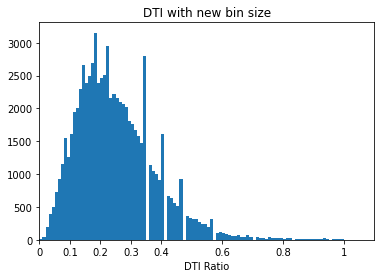

In [39]:
# Plotting a histogram with more bins.
bins = np.arange(0,1+0.01,0.01)
tick = [0,0.1,0.2,0.3,0.4,0.6,0.8,1]
labels = ['{}'.format(v)for v in tick]
plt.hist(x='DebtToIncomeRatio',data=df_filtered,bins=bins)
plt.xlabel('DTI Ratio')
plt.xticks(np.array(tick),labels)
plt.xlim(0,1.1)
plt.title('DTI with new bin size');

> The maximum DTI appears to be in the range of 0.15 and 0.2, which is a good DTI. The DTI count drops with a smooth slope after 0.2 (between 0.22 and 0.25 there is an increase in the DTI ratio counts).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were some points in the `DebtToIncomeRatio` variable that were higher than 1. I regarded them as outliers because, according to my research on minimum and maximum DTI, the maximum DTI can be as high as 50%, or 0.5. It is therefore extremely unlikely that DTI would be higher than 1. I performed some transformation on Debt to income ratio variable and Loan original amount variable.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I performed transformations on `DebtToIncomeRatio` variable and `LoanOriginalAmount` variable.
These transformations include:
- Changing the X-ticks to see the points of interest more precisely
- Changing bins size to reduce noise in the graph and view data more precisely.
- Using 'log' xscale to make interpretations from the graph easy.

## Bivariate Exploration

#### Question 10: What relationship or pattern is there between the numerical variables in the dataset?

In [40]:
# Let's make a list of all numerical variables
numeric_var = ['Term','BorrowerAPR','BorrowerRate','LoanOriginalAmount','CreditScoreRangeLower',
               'CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome']

#### Visualization

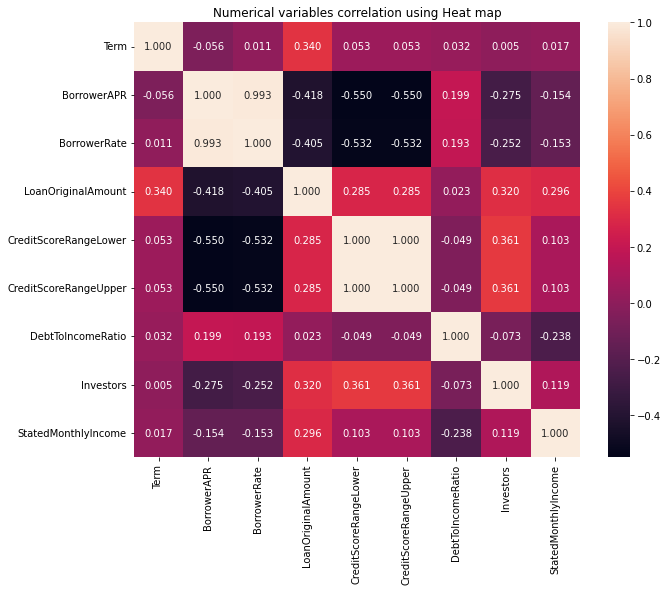

In [41]:
# Plotting a heat map to show the correlation of each numerical variable.
plt.figure(figsize=(10,8))
sns.heatmap(data=df_filtered[numeric_var].corr(),annot=True,fmt='.3f')
plt.title('Numerical variables correlation using Heat map');

#### Observations

> The borrower APR and borrower rate have a strong correlation. The borrower rate will rise if the APR rises, and vice versa. Investors and the initial loan amount have a moderate correlation.

#### Question 11: What relationship is there between `LoanStatus` and `[StatedMonthlyIncome, MonthlyLoanPayment, LoanOriginalAmount]`?

In [42]:
num_var = ['StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount']
ordr = ['Current','Completed','Chargedoff','FinalPaymentInProgress','Past Due (1-15 days)','Past Due (16-30 days)'
        ,'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Defaulted','Cancelled']

#### Visualization

<Figure size 720x720 with 0 Axes>

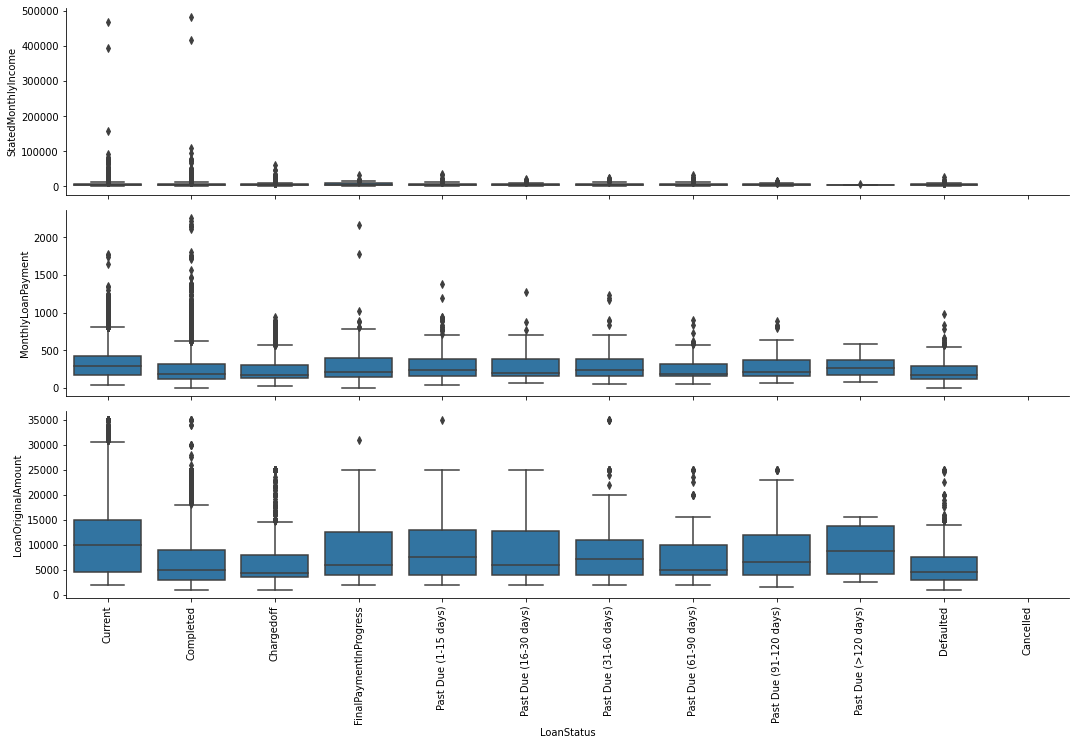

In [43]:
def boxplot(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color,order=ordr)
    plt.xticks(rotation=90)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df_filtered, y_vars = num_var, x_vars = 'LoanStatus',
                size = 3, aspect = 5)
g.map(boxplot);

#### Observations

> The relationship between monthly income and loan status is unfavorable. It is true that borrowers who have past due balances of 1 to 15 days have lower income than those who have past due balances of 120 days or more, and there is a slightly positive correlation between borrowers who have past due balances and greater loan requests.

In [44]:
# let's reset indexing
df_filtered.reset_index(inplace=True)

df_filtered.drop('index', axis=1, inplace=True)



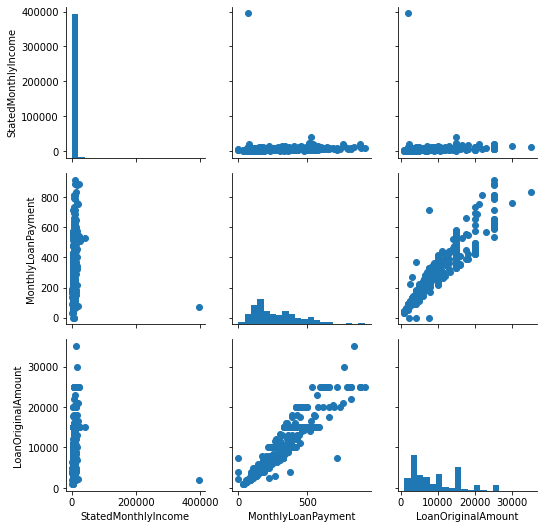

In [45]:
# Let's take a rondom sample of 500 loans and explore them
samples = np.random.choice(df_filtered.shape[0], 500, replace = False)
Loan_samp = df_filtered.loc[samples,:]

g = sns.PairGrid(data = Loan_samp, vars = num_var)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

> Between the Monthly Loan Amount and the Loan Original Amount, there is about a positive linear relationship, and there isn't much of a correlation between Monthly Income and Monthly Loan Payment.

#### Question 12: What relationship is there between numerical features `[StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount]` and categorical features `[Term,EmploymentStatus,CreditScore]`?

In [46]:
# Let's create a column for CreditScore
def Credit_score(x):
    outcome=""
    if x >= 300 :
        outcome = "Poor"
    if x>=550:
        outcome = "Fair"
    if x>=650:
        outcome = "Good"
    if x>=750:
        outcome = "Excellent"
    return outcome

df_filtered['CreditScore'] = df_filtered['CreditScoreRangeLower'].apply(Credit_score)

order = ['Poor','Fair','Good','Excellent']
order_class = pd.api.types.CategoricalDtype(ordered=True ,categories= order)
df_filtered['CreditScore'] = df_filtered['CreditScore'].astype(order_class)

#### Visualization

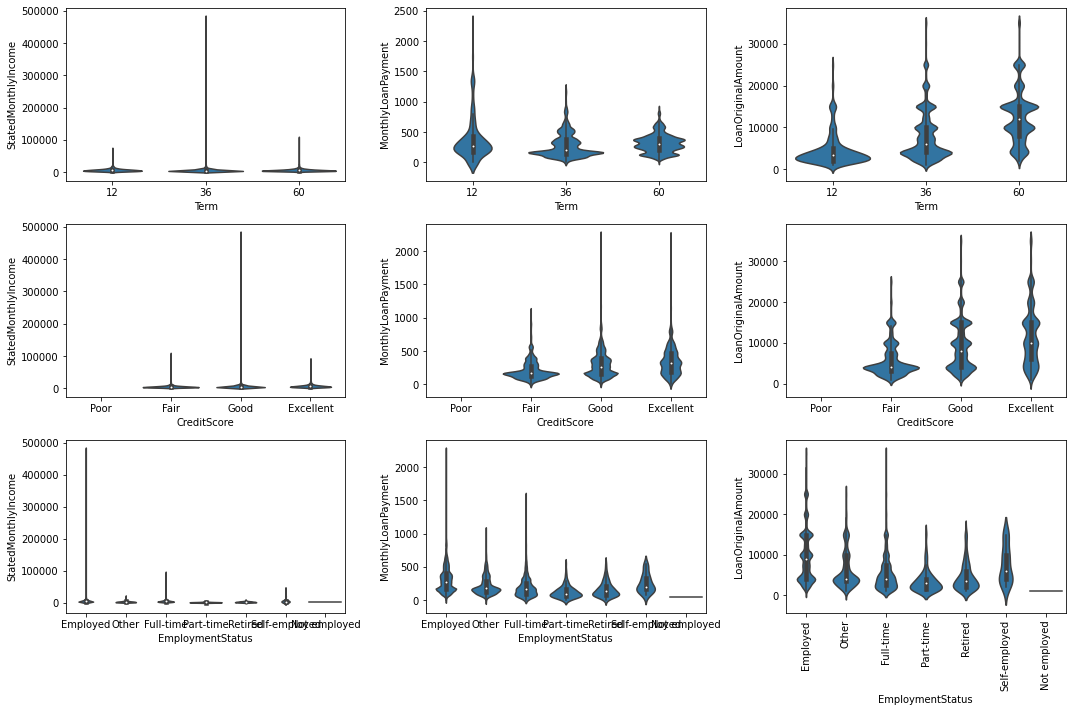

In [47]:
cat_var = ['Term','CreditScore','EmploymentStatus']
fig , ax = plt.subplots(nrows= 3 ,ncols=3,figsize =[15,10])
for i in range(len(cat_var)):
    var = cat_var[i]
    sns.violinplot(data=df_filtered,x=var, y='StatedMonthlyIncome',color=base_color, ax=ax[i,0])
    sns.violinplot(data=df_filtered,x=var, y='MonthlyLoanPayment' ,color=base_color, ax=ax[i,1])
    sns.violinplot(data=df_filtered,x=var, y='LoanOriginalAmount' ,color=base_color, ax=ax[i,2])
    plt.xticks(rotation = 90)
    
    
plt.tight_layout()

#### Observations

> The relationship between duration and monthly income is not strong; typically, a longer term results in higher monthly loan payments, but the plot demonstrates that borrowers who take out loans for five years pay larger monthly payments because they earn bigger loan amounts.
There is a linear relationship between CreditScore and other numerical parameters, and borrowers with bad credit pay less each month because they request little amounts and have lower monthly incomes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Monthly income and loan status are negatively correlated; the lower the income, the greater the likelihood of late payments and the borrower's take huge loans. The majority of borrowers take out loans for three years, with no relationship between the loan status and term years.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between Loan Monthly Payment and Loan Amount is roughly positive. Those who take out a loan for five years pay a lot each month, making a larger loan amount and practically having outstanding credit.

## Multivariate Exploration

#### Question 13: What relationship is there between `LoanStatus`, `Term` and `[StatedMonthlyIncome, MonthlyLoanPayment, LoanOriginalAmount]`?

#### Visualization

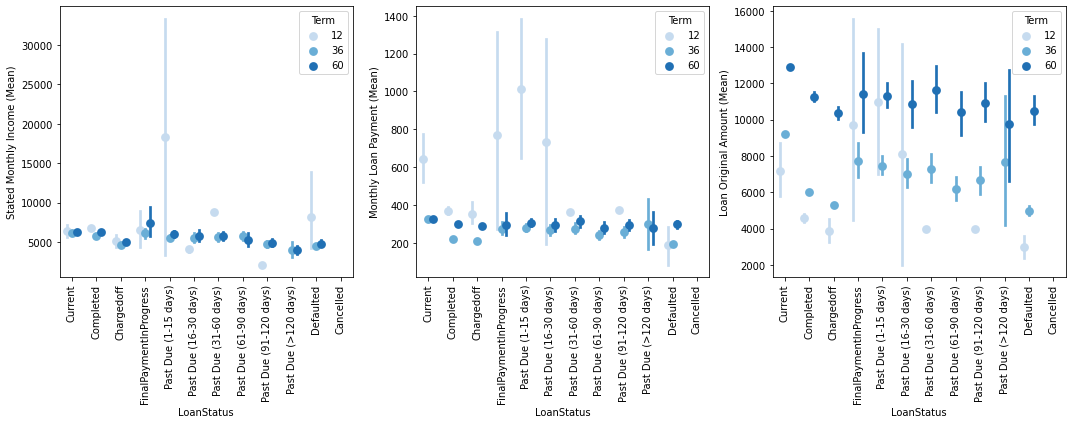

In [48]:
fig, ax = plt.subplots(ncols = 3, figsize = [15,6])

sns.pointplot(data = df_filtered, x = 'LoanStatus', y = 'StatedMonthlyIncome', hue = 'Term',order=ordr,
             palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_ylabel('Stated Monthly Income (Mean)')
ax[0].set_yticklabels([], minor = True)
ax[0].set_xticklabels(ordr, rotation = 90)

sns.pointplot(data = df_filtered, x = 'LoanStatus', y = 'MonthlyLoanPayment', hue = 'Term',order=ordr,
             palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_ylabel('Monthly Loan Payment (Mean)')
ax[1].set_yticklabels([],minor = True)
ax[1].set_xticklabels(ordr, rotation = 90)

sns.pointplot(data = df_filtered, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term',order=ordr,
             palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax[2])
ax[2].set_ylabel('Loan Original Amount (Mean)')
ax[2].set_yticklabels([], minor = True)
ax[2].set_xticklabels(ordr, rotation = 90)

plt.tight_layout()
plt.show();

#### Observations

> It is obvious that the payback delay will be greater the smaller the monthly income. In all circumstances, the longer the loan term, the higher the monthly loan payment. When the loan's monthly payment is substantial and the borrower's monthly income is modest, The repayment is frequently delayed. Most borrowers who require large loans stick with it for 5 years.

#### Question 14: What relationship is there between `CreditScore`, `StatedMonthlyIncome` and `LoanStatus`?

In [49]:
# Let's group data by credit score,loan status and calculating mean of monthly income for each grouping variable.
mean_income = df_filtered.groupby(['CreditScore','LoanStatus'])['StatedMonthlyIncome'].mean()

mi=mean_income.reset_index()

#### Visualization

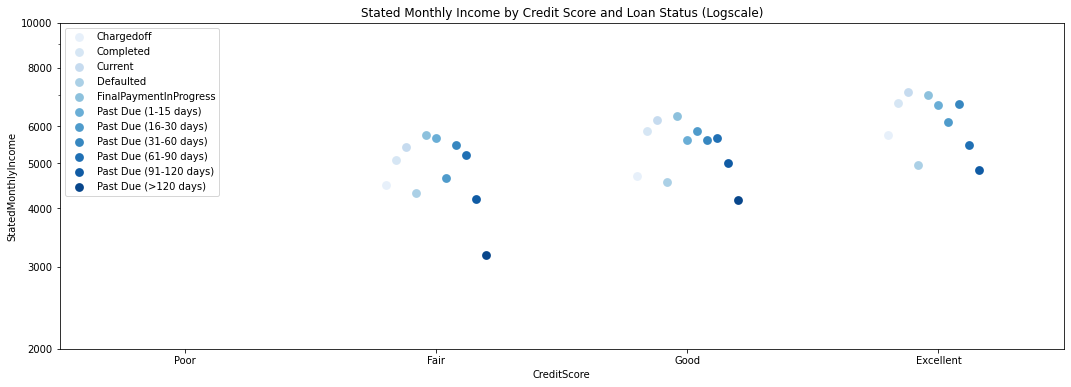

In [50]:
# Plotting pointplot by taking log transformation on y-axis.
fig = plt.figure(figsize = [18,6])
ax = sns.pointplot(data = mi, x = 'CreditScore', y = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)

plt.yscale('log')
plt.yticks([2e3, 3e3, 4e3,5e3,6e3,8e3,10e3], ['2000', '3000','4000','5000','6000','8000','10000'])
ax.set_yticklabels([],minor = True)

plt.legend(loc=2)
plt.title('Stated Monthly Income by Credit Score and Loan Status (Logscale)')
plt.show();

#### Observations

> The preceding point plot makes it evident that we may detect an increase in claimed monthly income as the loan status and credit score move from 'Poor' to 'Excellent'.

#### Question 15: What relationship or pattern is there between `ProsperRating (Alpha)` and `[Stated Monthly Income and Loan Original Amount]`?

#### Visualization

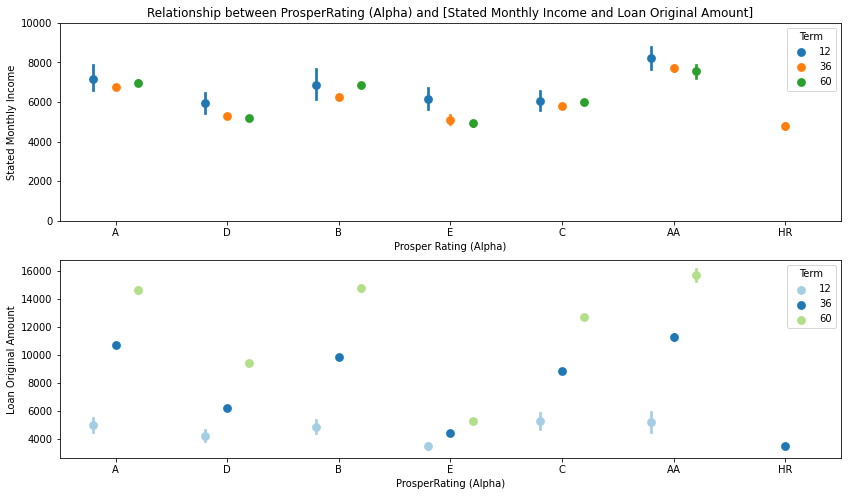

In [51]:
plt.figure(figsize=[14,8])
plt.subplot(2,1,1)
sns.pointplot(data = df_filtered, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'tab10', linestyles = '', dodge = 0.4)
plt.title("Relationship between ProsperRating (Alpha) and [Stated Monthly Income and Loan Original Amount]");
plt.xlabel("Prosper Rating (Alpha)");
plt.ylabel("Stated Monthly Income");

plt.ylim(0,10000);
plt.subplot(2,1,2)
sns.pointplot(data = df_filtered, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Paired', linestyles = '', dodge = 0.4);
plt.xlabel("ProsperRating (Alpha)");
plt.ylabel("Loan Original Amount");

#### Observations

> Regarding stated monthly income, it doesn't appear that term and rating interact because the pattern of the word is consistent across all ratings. However, there is a relationship between duration and rating and the loan amount. We can see that a higher Prosper rating results in higher loan amounts over all three terms as well as larger loan amplitudes between terms.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When borrowers request one term loan and their income is low and the repayment is largest in a year's term, they almost certainly postpone repayment and enter defaulted status because there is a negative link between monthly income and the length of the delay. I am unable to locate any proof that would explain why these borrowers defaulted.

### Were there any interesting or surprising interactions between features?

> Surprisingly, the majority of the data with the status "Not Employed" had low APR and low rate in the multivariate analysis of borrower APR, borrower Rate, and employment status (below 0.2). However, further study reveals that "Not employed" had a low loan amount at origination, a low debt to income ratio for the majority of borrowers, and very little data. This might be the cause of the low APR for "Not Employed."

In [52]:
# Export dataframe for visualization in Part II of the analysis
df_filtered.to_csv('prosperLoanData-clean.csv', index=False)